In [81]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import training_data
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 250

In [77]:
qb_total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1], pos='qb')
rb_total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1,2,3], pos='rb')
wr_total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1,2,3], pos='wr')
te_total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1], pos='te')

In [78]:
qb_train_df = training_data.make_training_df(qb_total_df, seasons=range(2004,2014), ppg=True)
rb_train_df = training_data.make_training_df(rb_total_df, seasons=range(2004,2014), ppg=True)
wr_train_df = training_data.make_training_df(wr_total_df, seasons=range(2004,2014), ppg=True)
te_train_df = training_data.make_training_df(te_total_df, seasons=range(2004,2014), ppg=True)

Group 0
mean: 8.09102564103
std: 6.68964346713
Group 1
mean: 17.4971830986
std: 6.03337288001


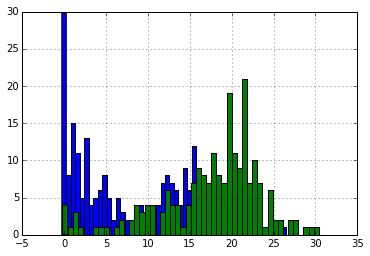

In [95]:
qb_clust = training_data.cluster_players(qb_train_df, n_clusters=2)

Group 0
mean: 14.3276785714
std: 5.2250463057
Group 1
mean: 3.47753479125
std: 3.77726697645
Group 2
mean: 9.47083333333
std: 5.23568228625


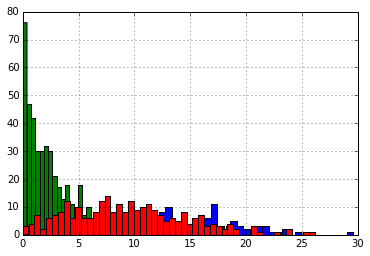

In [89]:
rb_clust = training_data.cluster_players(rb_train_df, n_clusters=3)

Group 0
mean: 7.88028571429
std: 4.30385009412
Group 1
mean: 9.0
std: 6.1717996655
Group 2
mean: 13.1325
std: 4.55468920455
Group 3
mean: 4.25628140704
std: 3.92607546847


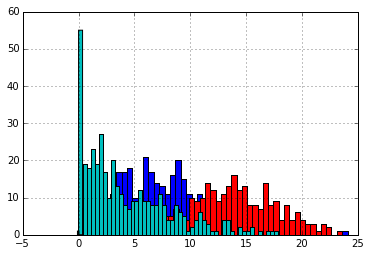

In [96]:
wr_clust = training_data.cluster_players(wr_train_df, n_clusters=4)

Group 0
mean: 6.83266666667
std: 3.11014461972
Group 1
mean: 3.13694915254
std: 2.61845293581
Group 2
mean: 11.1678571429
std: 3.87308049891


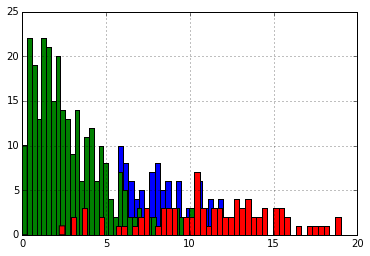

In [98]:
te_clust = training_data.cluster_players(te_train_df, n_clusters=3)

In [46]:
rb_train_df[rb_train_df.Cluster == 1]

,Name,Games_1,RunAtt_1,RunYards_1,RunTD_1,Targets_1,Rec_1,RecYards_1,RecTD_1,FFP_1,FFPPG_1,Games_2,RunAtt_2,RunYards_2,RunTD_2,Targets_2,Rec_2,RecYards_2,RecTD_2,FFP_2,FFPPG_2,FFPPG,Cluster
12,BrianWestbrook,13,177,812,3,87,73,703,6,278.5,21.4,12,157,614,3,96,61,616,4,226.0,18.8,22.3,1
21,ClintonPortis,15,343,1315,5,57,40,235,2,237.0,15.8,16,352,1516,11,41,30,216,0,269.2,16.8,16.0,1
22,CoreyDillon,15,345,1635,12,21,15,103,1,266.8,17.8,12,209,733,12,26,22,181,1,191.4,16.0,11.8,1
35,EdgerrinJames,16,334,1548,9,60,51,483,0,308.1,19.3,15,360,1506,13,50,44,337,1,312.3,20.8,13.2,1
60,LaDainianTomlinson,15,339,1335,17,66,53,441,1,338.6,22.6,16,340,1464,18,77,51,370,2,354.4,22.2,29.6,1
61,LaMontJordan,16,93,479,2,16,15,112,0,86.1,5.4,14,272,1025,9,103,70,563,2,294.8,21.1,7.3,1
64,LarryJohnson,10,120,581,9,29,22,278,2,173.9,17.4,16,336,1750,20,49,33,343,1,368.3,23.0,23.4,1
73,MichaelPittman,13,219,926,7,65,41,391,3,232.7,17.9,16,70,436,1,47,36,300,1,121.6,7.6,7.4,1
87,ReubenDroughns,16,275,1240,6,44,32,241,2,228.1,14.3,16,309,1232,2,56,39,369,0,211.1,13.2,10.3,1
90,RudiJohnson,16,362,1457,12,28,15,84,0,241.1,15.1,16,337,1458,12,30,23,90,0,249.8,15.6,14.9,1


In [50]:
pred_dat = training_data.data_for_projection(rb_total_df, season=2015)

In [54]:
X_pred = np.array(pred_dat.drop(['Name'], axis=1))
X_pred = preprocessing.scale(X_pred)
y_pred = kmean_model.fit_predict(X_pred)
pred_dat['2015 Pred Group'] = y_pred

In [55]:
pred_dat

,Name,Games_1,RunAtt_1,RunYards_1,RunTD_1,Targets_1,Rec_1,RecYards_1,RecTD_1,FFP_1,FFPPG_1,Games_2,RunAtt_2,RunYards_2,RunTD_2,Targets_2,Rec_2,RecYards_2,RecTD_2,FFP_2,FFPPG_2,2015 Pred Group
0,AdrianPeterson,14,279,1266,10,40,29,171,1,238.7,17.1,1,21,75,0,3,2,18,0,11.3,11.3,2
1,AhmadBradshaw,3,41,186,2,8,7,42,0,41.8,13.9,10,90,425,2,47,38,300,6,158.5,15.9,0
3,AlfonsoSmith,8,18,54,1,13,10,68,0,28.2,3.5,3,7,19,0,4,3,11,0,6.0,2.0,0
4,AlfredMorris,16,276,1275,7,12,9,78,0,186.3,11.6,16,265,1074,8,26,17,155,0,187.9,11.7,2
6,AndreEllington,15,117,652,3,57,39,371,1,165.3,11.0,12,201,660,3,64,46,395,2,181.5,15.1,1
7,AnthonyDixon,10,28,56,2,3,3,30,0,23.6,2.4,13,105,432,2,9,8,49,0,68.1,5.2,0
8,AnthonySherman,11,2,3,0,24,18,155,1,39.8,3.6,11,2,8,0,14,10,71,1,23.9,2.2,0
9,AntoneSmith,4,5,145,2,3,2,10,0,29.5,7.4,10,23,144,2,15,13,222,3,79.6,8.0,0
10,ArianFoster,8,121,542,1,35,22,183,1,106.5,13.3,13,260,1246,8,59,38,327,5,273.3,21.0,1
13,BenTate,14,181,771,4,49,34,140,0,149.1,10.7,11,119,370,4,12,9,60,0,76.0,6.9,2


In [56]:
pred_dat[pred_dat['2015 Pred Group'] == 1]

,Name,Games_1,RunAtt_1,RunYards_1,RunTD_1,Targets_1,Rec_1,RecYards_1,RecTD_1,FFP_1,FFPPG_1,Games_2,RunAtt_2,RunYards_2,RunTD_2,Targets_2,Rec_2,RecYards_2,RecTD_2,FFP_2,FFPPG_2,2015 Pred Group
6,AndreEllington,15,117,652,3,57,39,371,1,165.3,11.0,12,201,660,3,64,46,395,2,181.5,15.1,1
10,ArianFoster,8,121,542,1,35,22,183,1,106.5,13.3,13,260,1246,8,59,38,327,5,273.3,21.0,1
43,DarrenSproles,15,53,220,2,89,71,604,2,177.4,11.8,15,57,329,6,62,40,387,0,147.6,9.8,1
47,DeMarcoMurray,14,217,1124,9,66,53,348,1,260.2,18.6,16,393,1845,13,64,57,416,0,361.1,22.6,1
54,EddieLacy,15,284,1178,11,44,35,257,0,244.5,16.3,16,246,1139,9,55,42,427,4,276.6,17.3,1
62,FredJackson,16,207,896,9,65,46,375,1,233.1,14.6,14,142,526,2,90,66,501,1,186.7,13.3,1
63,GiovaniBernard,16,170,695,5,71,56,514,3,224.9,14.1,13,168,680,5,59,43,349,2,187.9,14.5,1
70,JamaalCharles,15,259,1288,12,104,70,693,7,382.1,25.5,15,205,1039,9,59,40,291,5,257.0,17.1,1
78,JoiqueBell,16,166,650,8,69,53,547,0,220.7,13.8,15,223,860,7,53,34,322,1,200.2,13.3,1
94,LamarMiller,16,177,709,2,35,26,170,0,125.9,7.9,16,216,1099,8,52,38,275,1,229.4,14.3,1
